In [1]:
from sklearn.model_selection import KFold
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def delete_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/credit_scoring_sample.csv', sep=';')
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


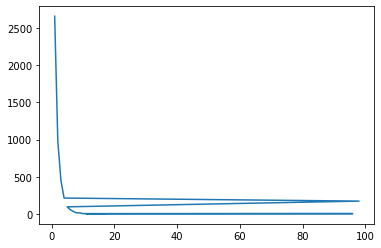

In [55]:
plt.plot(data['NumberOfTimes90DaysLate'].value_counts()[1:])

In [54]:
data['NumberOfTimes90DaysLate'].value_counts()[1:]

1     2655
2      980
3      448
4      214
98     173
5       96
6       56
7       33
8       15
9       15
10       5
96       5
11       3
13       2
15       1
12       1
14       1
17       1
Name: NumberOfTimes90DaysLate, dtype: int64

In [6]:
data[data['NumberOfTimes90DaysLate'] == 96]

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
27929,1,34,96,0.000000,96,96,3500.0,1.0
28137,1,29,96,0.000000,96,96,2800.0,2.0
28451,1,33,96,0.008047,96,96,4100.0,0.0
37759,0,46,96,0.051765,96,96,4616.0,0.0
42278,1,26,96,0.000000,96,96,NaN,0.0


In [7]:
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

Distribution of target


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

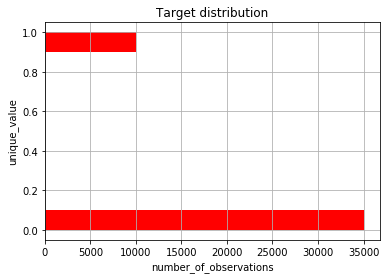

In [8]:
ax = data["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of target")
data["SeriousDlqin2yrs"].value_counts() / data.shape[0]

In [9]:
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [10]:
data.isna().any()

SeriousDlqin2yrs                        False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
NumberOfTimes90DaysLate                 False
NumberOfTime60-89DaysPastDueNotWorse    False
MonthlyIncome                            True
NumberOfDependents                       True
dtype: bool

In [11]:
table = delete_nan(data)

In [12]:
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

In [13]:
def get_bootstrap_samples(data, n_samples):
    np.random.seed(0)
    indexes = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indexes]
    return samples

In [14]:
def stat_intervals(data, alpha):
    boundaries = np.percentile(data, [100*alpha/2., 100*(1- alpha/2.)])
    return boundaries

In [15]:
bootstrap_age = [i.mean() for i in get_bootstrap_samples(data[data["SeriousDlqin2yrs"] == 1]["age"].values, 1000)]

In [16]:
stat_intervals(bootstrap_age, 0.1)

array([45.71379414, 46.12700479])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold


lr = LogisticRegression(random_state=5, class_weight='balanced')

parameters = {"C" : (0.0001, 0.001, 0.01, 0.1, 1, 10)}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [18]:
log_reg_grid = GridSearchCV(lr, parameters, cv=skf, n_jobs=-1, scoring='roc_auc')

In [19]:
log_reg_grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=5, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [20]:
log_reg_grid.best_params_

{'C': 0.001}

In [21]:
log_reg_grid.cv_results_.items()

dict_items([('mean_fit_time', array([2.67953677, 0.30750175, 0.33548608, 0.35248628, 0.45130072,
       0.41226659])), ('std_fit_time', array([3.00089655, 0.04508179, 0.04073485, 0.02279406, 0.06764778,
       0.0357013 ])), ('mean_score_time', array([0.07135968, 0.00312467, 0.01562381, 0.00219998, 0.00844917,
       0.0059989 ])), ('std_score_time', array([8.22290561e-02, 6.24933243e-03, 5.00111031e-07, 2.71286546e-03,
       6.20090132e-03, 1.09519188e-03])), ('param_C', masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object)), ('params', [{'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}]), ('split0_test_score', array([0.79006524, 0.79357006, 0.78806353, 0.78616989, 0.78513745,
       0.7851011 ])), ('split1_test_score', array([0.78532475, 0.79202091, 0.78809344, 0.78566437, 0.78554516,
       0.78513558])), ('split2_test_score', array([0.79357401, 0.79

In [22]:
log_reg_grid.best_score_

0.7962065196076743

In [23]:
log_reg_grid.cv_results_['split0_test_score']

array([0.79006524, 0.79357006, 0.78806353, 0.78616989, 0.78513745,
       0.7851011 ])

In [24]:
lr = LogisticRegression(random_state=5, class_weight='balanced', C=0.001)

In [25]:
lr.fit(X, y)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.coef_

array([[-1.81971398e-02,  4.85442138e-01, -1.09683023e-05,
         4.25956473e-01,  6.16333724e-02, -1.14475920e-05,
         1.13949251e-01]])

In [28]:
from sklearn import preprocessing

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()

In [30]:
x_scaled = min_max_scaler.fit_transform(X.values)

In [31]:
lr.fit(x_scaled, y)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lr.coef_[0]

array([-0.62612818,  0.19311834, -0.00195382,  0.1750934 ,  0.14623035,
       -0.00436268,  0.19538902])

In [33]:
import scipy
scipy.special.softmax(lr.coef_[0])

array([0.07318083, 0.16603191, 0.13660695, 0.163066  , 0.15842669,
       0.13627828, 0.16640934])

In [34]:
log_reg_grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=5, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [36]:
log_reg_grid.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
log_reg_grid_best = log_reg_grid.best_estimator_

In [38]:
scipy.special.softmax(log_reg_grid_best.coef_[0])

array([0.1179943 , 0.19524898, 0.12015979, 0.18397317, 0.12780003,
       0.12015974, 0.13466399])

In [39]:
log_reg_grid_best.coef_

array([[-1.81971398e-02,  4.85442138e-01, -1.09683023e-05,
         4.25956473e-01,  6.16333724e-02, -1.14475920e-05,
         1.13949251e-01]])

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Инициализируем случайный лес с 100 деревьями и сбалансированными классами
rf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    oob_score=True,
    class_weight="balanced",
)

## Будем искать лучшие параметры среди следующего набора
parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

## Делаем опять же стрэтифайд k-fold валидацию. Инициализация которой должна у вас продолжать храниться в skf

In [43]:
gcv = GridSearchCV(rf, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=42,
                         

In [44]:
gcv.best_score_ - 0.7962065196076743

0.01885239790780402

In [45]:
gcv.best_estimator_.feature_importances_

array([0.14710464, 0.21780516, 0.16992599, 0.19753667, 0.11279971,
       0.12818763, 0.0266402 ])

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}

In [47]:
lr3 = LogisticRegression()

In [48]:
bclf = BaggingClassifier(base_estimator=lr3, n_estimators=100, random_state=42)

In [50]:
RSV = RandomizedSearchCV(bclf, parameters, n_iter=20, cv=skf, random_state=1).fit(X, y)

In [51]:
RSV.best_estimator_

BaggingClassifier(base_estimator=LogisticRegression(C=10, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=4,
                  max_samples=0.5, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=42, verb

In [52]:
RSV.best_score

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score'